<a href="https://colab.research.google.com/github/annabelthomp/writt20833/blob/main/notebooks/homework/WRIT20833_HW4-1_Term_Frequency_Sentiment_F25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/TCU-DCDA/WRIT20833-2025/blob/main/notebooks/homework/WRIT20833_HW4-1_Term_Frequency_Sentiment_F25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4-1: Term Frequency and Sentiment Analysis
**Due: October 5th**  
**Intro to Coding in the Humanities - Midterm Assignment Part 1**

**Student Name:** Annabel Thompson

**Upload:** `LASTNAME_HW4-1_F25.ipynb`

---

## Assignment Overview

This assignment marks your first extensive analysis of a text-heavy dataset of your choosing. The goal is not just to run analytical tools, but to experience the process of moving from assumptions to data-driven insights. You'll practice forming hypotheses, testing them against actual data, and allowing your understanding to evolve based on what you discover.

In our digital age, we're constantly exposed to two very different paths to forming opinions and understanding the world. One path leads from genuine phenomena through careful data collection and analysis toward real insight, knowledge, and wisdom. The other path starts with social media impressions and moves through cherry-picked evidence and narrative scaffolding toward rigid ideological positions. Through this assignment, you'll experience the first path—the harder but more rewarding journey of letting data challenge and refine your thinking.

**Important Philosophy**: Being "wrong" in your initial predictions is not a failure—it's a sign of genuine learning and intellectual growth. The best insights often come from discovering that reality differs from our assumptions. When your data surprises you, that's when real learning happens.

**Collaboration Policy**: You may work together with classmates to solve technical challenges and discuss methods, but each student must choose their own unique dataset and complete their own analysis.

## Step 1: Dataset Loading and Initial Exploration
*Moving from Scraped Data to Analysis-Ready Dataset*

### Loading Your Cultural Dataset

You'll use the cultural dataset you collected using the Instant Data Scraper in our previous lesson. This should be a CSV file with rich text content suitable for both term frequency and sentiment analysis.

In [5]:
# Setup: Import all libraries we'll need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

# Display settings for better output
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

print("📚 Libraries imported - ready for analysis!")

📚 Libraries imported - ready for analysis!


In [7]:
# Load your scraped cultural data
# Replace 'your_filename.csv' with your actual file name

# If you're in Google Colab, upload your file first:
# from google.colab import files
# uploaded = files.upload()

# Load your data (fill in your filename)
df = pd.read_csv('/mnt/data/Thompson_HW4_1_cleaned_data.csv')  # Replace with your CSV filename

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")

Saving imdb_robots.csv to imdb_robots (1).csv
✅ Dataset loaded successfully from imdb_robots (1).csv!
Dataset contains 47 items


### Technical Checkpoint 1: Data Loading Reality Check

In [9]:
# Checkpoint 1: Verify your data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Replace 'YOUR_TEXT_COLUMN' with your actual text column name
text_column = 'Disallow'  # Fill in your main text column name based on the available columns

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")

Dataset shape: (47, 2)
Columns: ['User-agent', 'Disallow']
Text column has 0 missing values
Sample text: /OnThisDay


In [10]:
# Explore your dataset structure
print("=== DATASET EXPLORATION ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET EXPLORATION ===
Total entries: 47

Data types:
User-agent    object
Disallow      object
dtype: object

First few rows:


,User-agent,Disallow
0,*,/OnThisDay
1,*,/*/OnThisDay
2,*,/ads/
3,*,/*/ads/
4,*,/ap/


### Initial Predictions

Before analyzing your data, record your predictions. This is like forming "first impressions" from HW1, but now for both word frequency AND sentiment patterns.

**Examples to model your thinking:**
- *Restaurant reviews*: "I predict negative reviews will focus on 'slow,' 'cold,' and 'rude' while positive reviews will emphasize 'fresh,' 'friendly,' and 'delicious.' I expect about 60% positive sentiment overall."
- *Museum reviews*: "I predict frequent words like 'interesting,' 'beautiful,' and 'educational' with mostly positive sentiment, but some complaints about 'crowded' or 'expensive.'"

### 📝 My Initial Predictions:

**Dataset Description:** I scraped IMDbs robots.txt file. It lists which bots are blocked from accessing certain parts of the site. I chose it to study web restrictions and bot policies.


**Term Frequency Predictions:** I expect “Disallow,” “User-agent,” and “/find” to appear the most often. Paths like “search,” “user,” and “registration” will also repeat.


**Sentiment Predictions:** The tone will be neutral and technical. Its about control, not emotion.


**Most Confident Prediction:** The “*” user-agent group will have the most disallow rules. The word “Disallow” will be the most frequent term.


**Biggest Question:** I’m most curious which bots are fully blocked and why IMDb restricts those specific ones.


---

## Step 2: Text Preparation for Analysis
*Building on HW1 Text Processing Skills*

Just like in HW1, we need to prepare our text for analysis. But this time, we're preparing for TWO types of analysis: term frequency (like HW1) and sentiment analysis (new!).

In [17]:
# Enhanced stopwords list (building on HW1)
stopwords = [
    # Basic stopwords from HW1
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",

    # Additional common words for cultural data
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way", "may",
    "said", "say", "new", "first", "last", "long", "little", "much", "well", "still"
]

print(f"✅ Stopwords list loaded: {len(stopwords)} words to filter out")

✅ Stopwords list loaded: 151 words to filter out


In [12]:
# Text processing functions (building on HW1 approach)
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handle missing text
        return []
    lowercase_text = str(text).lower()
    # Split text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  # Remove empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("✅ Text processing functions ready")

✅ Text processing functions ready


In [15]:
# Apply text cleaning to your dataset
# Replace 'text_column' with your actual column name

# Create cleaned text for sentiment analysis (keep punctuation)
df['clean_text_sentiment'] = df[text_column].apply(clean_for_sentiment)

# Create word lists for term frequency analysis (like HW1)
df['words'] = df[text_column].apply(split_into_words)
df['meaningful_words'] = df['words'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("✅ Text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")

✅ Text cleaning complete
Sample cleaned text for sentiment: /OnThisDay...
Sample meaningful words: ['onthisday']


### Technical Checkpoint 2: Text Cleaning Verification

In [18]:
# Checkpoint 2: Check your cleaning worked
sample_text = df[text_column].iloc[0]
print(f"Original: {sample_text[:100]}")
print(f"For sentiment: {df['clean_text_sentiment'].iloc[0][:100]}")
print(f"Meaningful words: {df['meaningful_words'].iloc[0][:15]}")
# Should show: sentiment text keeps punctuation, meaningful words exclude stopwords

Original: /OnThisDay
For sentiment: /OnThisDay
Meaningful words: ['onthisday']


---

## Step 3: Term Frequency Analysis
*Building on HW1 Word Counting Skills*

Now let's analyze which words appear most frequently in your cultural dataset, just like you did in HW1 but with more sophisticated text processing.

In [20]:
# Combine all meaningful words from your dataset (like HW1)
all_meaningful_words = []
for word_list in df['meaningful_words']:
    all_meaningful_words.extend(word_list)

# Count word frequencies (same as HW1)
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)  # Get top 20 words

print("🔤 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print(f"\nTop 20 most frequent words:")

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 104
Unique words found: 43

Top 20 most frequent words:
 1. search          (6 times)
 2. find            (6 times)
 3. user            (6 times)
 4. text            (4 times)
 5. title           (4 times)
 6. ur              (4 times)
 7. onthisday       (2 times)
 8. ads             (2 times)
 9. ap              (2 times)
10. mymovies        (2 times)
11. register        (2 times)
12. registration    (2 times)
13. name            (2 times)
14. updates         (2 times)
15. title_type      (2 times)
16. feature         (2 times)
17. tv_movie        (2 times)
18. tv_miniseries   (2 times)
19. documentary     (2 times)
20. short           (2 times)


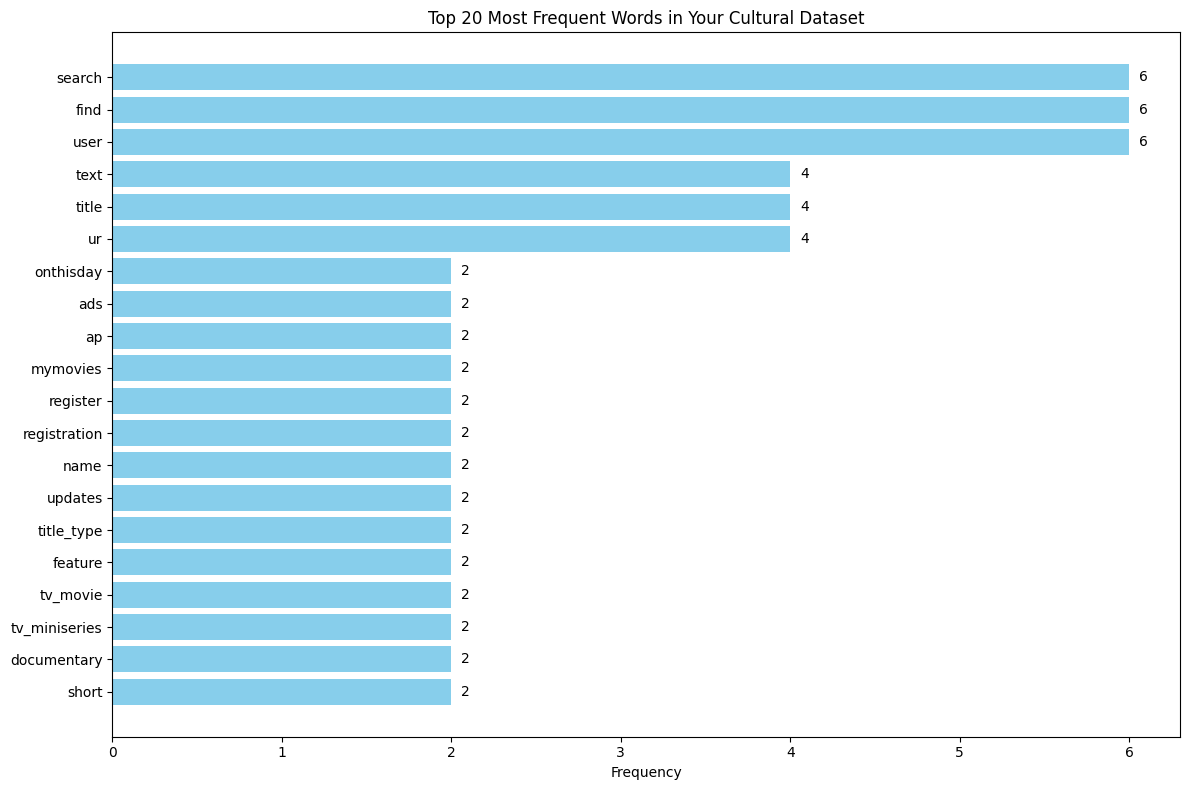

📊 Term frequency visualization complete!


In [22]:
# Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Your Cultural Dataset')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("📊 Term frequency visualization complete!")

### 📝 Term Frequency Reflection:

**Prediction Check:** "Search", "find," and "user" are the top words. The ones that surprised me most are, "ur," "tv_movie," and documentary."


**New Discoveries:** "Ur" is a new discovery. Media categories also appeared like "tv_movie," and "documentary," which reveal targeted blocking of specific search facets.


**Questions for Sentiment Analysis:** I now want to explore more about if sentiment is neutral across all user agent groups.

---

## Step 4: Sentiment Analysis with VADER
*Building on VADER CodeAlong Skills*

Now let's analyze the emotional tone of your cultural texts using VADER, focusing on the compound sentiment scores.

In [23]:
# Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
✅ VADER installed and ready for sentiment analysis!


### Technical Checkpoint 3: VADER Installation/Import

In [24]:
# Checkpoint 3: VADER setup
test_text = "This assignment is surprisingly interesting!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)

Test text: This assignment is surprisingly interesting!
VADER result: {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.636}


In [26]:
# Apply sentiment analysis to your entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to your entire dataset
df['sentiment_score'] = df['clean_text_sentiment'].apply(get_sentiment_score) # Fill in: what function?

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: 0.000 to 0.000
Average sentiment: 0.000


In [27]:
# Analyze sentiment patterns in your data
print("🎭 SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

🎭 SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 47
Average sentiment: 0.000
Most positive entry: 0.000
Most negative entry: 0.000
Standard deviation: 0.000

Sentiment distribution:
Positive (>0.1): 0 (0.0%)
Neutral (-0.1 to 0.1): 47 (100.0%)
Negative (<-0.1): 0 (0.0%)


In [28]:
# Find most positive and negative examples
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['clean_text_sentiment'][:200]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['clean_text_sentiment'][:200]}...")

📈 MOST POSITIVE ENTRY (score: 0.000):
Text: /OnThisDay...

📉 MOST NEGATIVE ENTRY (score: 0.000):
Text: /OnThisDay...


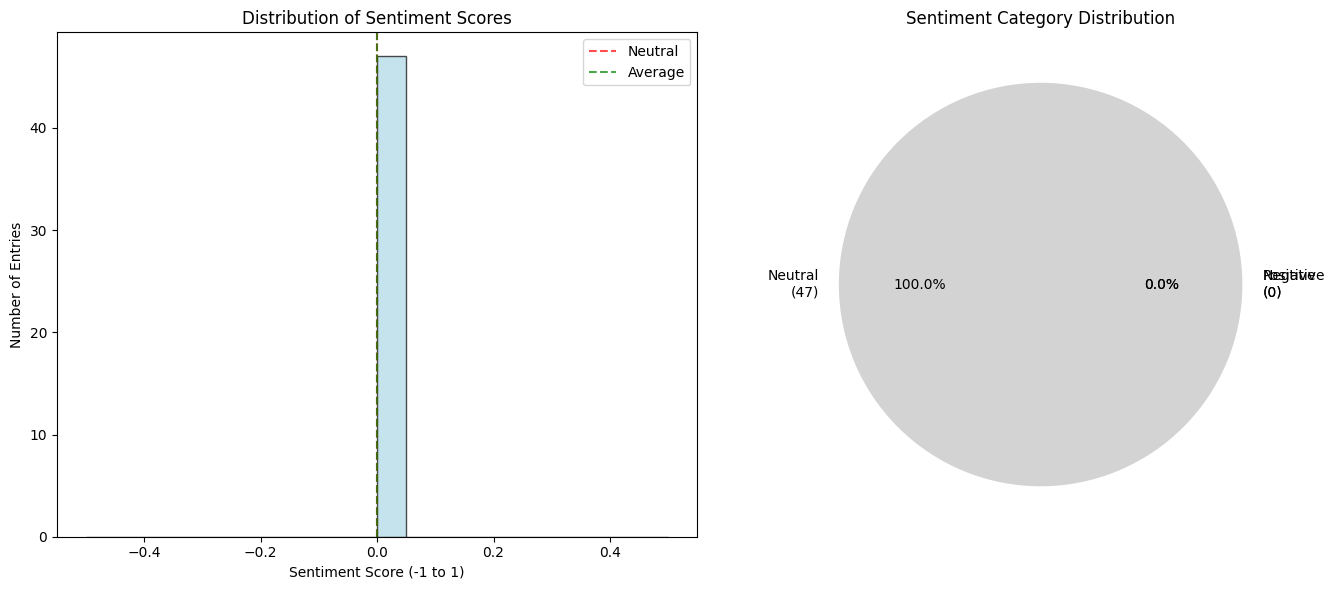

📊 Sentiment visualizations complete!


In [29]:
# Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution')

plt.tight_layout()
plt.show()

print("📊 Sentiment visualizations complete!")

### Human vs. Automated Sentiment Check

Let's test VADER's accuracy by comparing it to your human judgment:

In [30]:
# Sample 5 entries for human vs. VADER comparison
sample_entries = df.sample(5)

print("🧠 HUMAN vs. VADER SENTIMENT COMPARISON")
print("=" * 45)
print("Read each text below and judge its sentiment, then compare to VADER's score:\n")

for i, (idx, row) in enumerate(sample_entries.iterrows(), 1):
    print(f"Text {i}:")
    print(f"'{row['clean_text_sentiment'][:150]}...'")
    print(f"VADER Score: {row['sentiment_score']:.3f}")
    print(f"Your Human Judgment: _____ (Positive/Neutral/Negative)")
    print(f"Agreement? _____ (Yes/No - explain any differences)")
    print()

🧠 HUMAN vs. VADER SENTIMENT COMPARISON
Read each text below and judge its sentiment, then compare to VADER's score:

Text 1:
'/find...'
VADER Score: 0.000
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 2:
'/*/user/*...'
VADER Score: 0.000
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 3:
'/find$...'
VADER Score: 0.000
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 4:
'/registration/...'
VADER Score: 0.000
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 5:
'/*/find$...'
VADER Score: 0.000
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)



### 📝 Sentiment Analysis Reflection:

**Sentiment Patterns:** All the entries were neutral and the scores stayed at 0. This matched the policy expectations. There were no positive or negative entries.


**VADER Accuracy:** I agree with VADER, the path strings read neutral. VADER works well on natural language with sentiment words. It does not do well with URLs and codes.

**Unexpected Discoveries:** What surprised me the most was that the distribution was perfectly all zero flat. Most positive and most negative were also both identical.

---

## Step 5: Integration and Critical Analysis
*Connecting Term Frequency and Sentiment Insights*

Now let's explore how your term frequency and sentiment findings work together to reveal deeper patterns in your cultural data.

In [31]:
# Analyze word frequency in positive vs. negative entries
positive_entries = df[df['sentiment_score'] > 0.1]
negative_entries = df[df['sentiment_score'] < -0.1]

print("🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES")
print("=" * 55)

# Get top words from positive entries
positive_words = []
for word_list in positive_entries['meaningful_words']:
    positive_words.extend(word_list)
positive_freq = Counter(positive_words)

# Get top words from negative entries
negative_words = []
for word_list in negative_entries['meaningful_words']:
    negative_words.extend(word_list)
negative_freq = Counter(negative_words)

print(f"Top 10 words in POSITIVE entries ({len(positive_entries)} entries):")
for word, count in positive_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

print(f"\nTop 10 words in NEGATIVE entries ({len(negative_entries)} entries):")
for word, count in negative_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES
Top 10 words in POSITIVE entries (0 entries):

Top 10 words in NEGATIVE entries (0 entries):


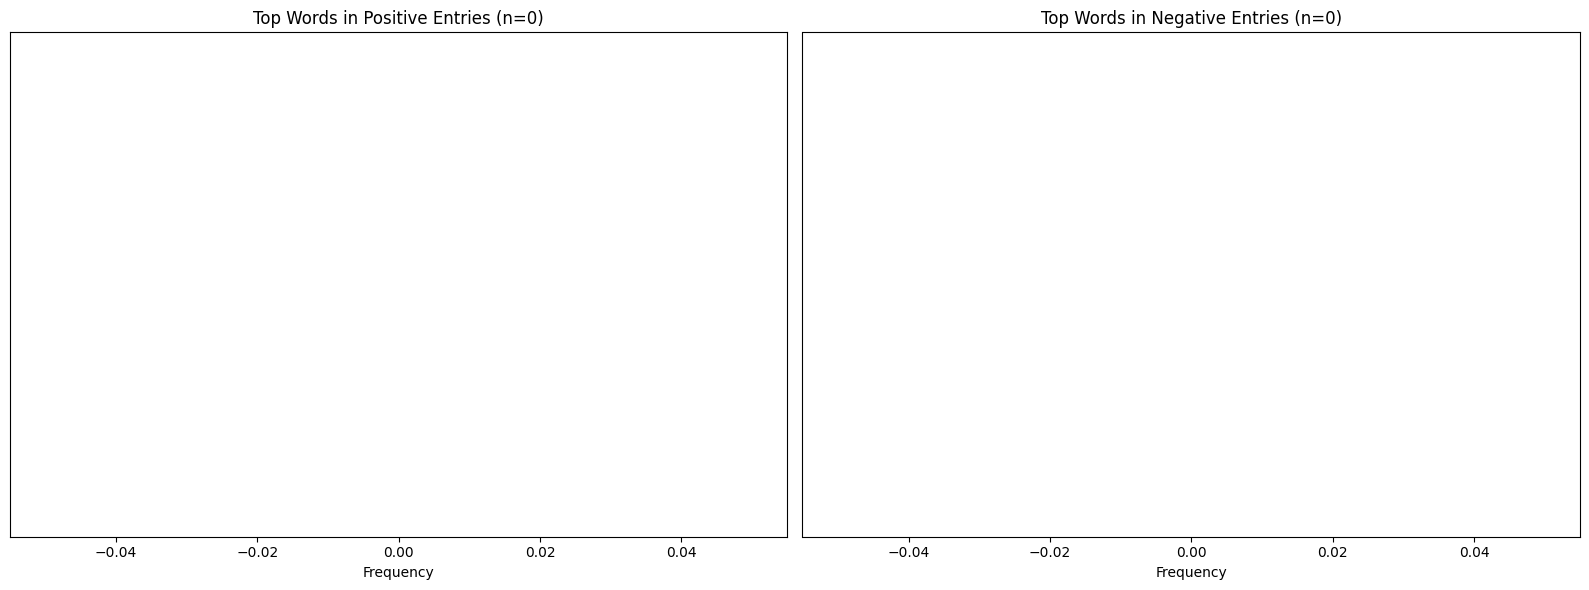

In [32]:
# Create comparison visualization

#I am not sure if this part is correct, as nothing is displayed below. I think I may have done a step wrong however have attempted changing and nothing works.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
pos_words = [word for word, count in positive_freq.most_common(10)]
pos_counts = [count for word, count in positive_freq.most_common(10)]

axes[0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[0].set_yticks(range(len(pos_words)))
axes[0].set_yticklabels(pos_words)
axes[0].set_title(f'Top Words in Positive Entries (n={len(positive_entries)})')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Negative words
neg_words = [word for word, count in negative_freq.most_common(10)]
neg_counts = [count for word, count in negative_freq.most_common(10)]

axes[1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[1].set_yticks(range(len(neg_words)))
axes[1].set_yticklabels(neg_words)
axes[1].set_title(f'Top Words in Negative Entries (n={len(negative_entries)})')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Bridge to Part 2 (HW4-2)

Based on your term frequency and sentiment findings, make a prediction about what deeper topics or themes topic modeling might reveal in your data:

### 📝 Integration Analysis and HW4-2 Prediction:

**Combined Insights:** Sentiment is always neutral across all rows. High frequency words group by function like search/find and user/ratings. The groupings are also expected by product not by tone.

**Most Revealing Analysis:** Term frequency was more informative out of the two. It showed which site areas IMDb restricts, sentiment added less because the strings are URLs and directives.

**Topic Modeling Prediction:** I believe search and discovery will be revealed as well as user accounts and privacy.


---

## Step 6: Final Reflection
*From Assumptions to Data-Driven Insights*

This final reflection is the heart of the assignment. Think deeply about how your understanding evolved through this analysis process.

### 📝 Final Reflection (3-4 paragraphs):

Address these questions in your reflection:

**Evolution of Understanding:** *How did your understanding change from your initial predictions through term frequency, then sentiment analysis? Where were you most wrong, and what did those surprises teach you?*

**Computational vs. Traditional Analysis:** *How does this data-driven approach compare to how you might traditionally analyze texts in humanities courses? Consider how this process helps you avoid the trap of cherry-picking evidence to support predetermined conclusions. What are the advantages and limitations of automated analysis?*

**Personal Learning:** *What did this process teach you about forming and testing hypotheses? How has your relationship to evidence and conclusions evolved?*

**Cultural Insights:** *What did you discover about the cultural phenomenon you studied? What questions does this analysis raise for further research?*

---

**Write your reflection here:**



---

## Step 7: Save Your Work and Prepare Deliverables

Make sure to save all your work and prepare the required files for submission.

In [ ]:
# Save your cleaned dataset
output_filename = 'LASTNAME_HW4-1_cleaned_data.csv'  # Replace LASTNAME with your actual last name
df.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as: {output_filename}")
print(f"\nDataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"- Most frequent word: '{top_words[0][0]}' ({top_words[0][1]} times)")

### 📋 Submission Checklist

Before submitting, make sure you have:

- [ ] **Completed all code cells** with your own data and analysis
- [ ] **Filled in all prediction and reflection sections** with thoughtful responses
- [ ] **Verified your visualizations** display correctly
- [ ] **Saved your cleaned dataset** as a CSV file
- [ ] **Named your files correctly**: `LASTNAME_HW4-1_F25.ipynb` and `LASTNAME_HW4-1_cleaned_data.csv`

### 📤 What to Submit:

Submit to your **Pre-Project Practice Files** dropbox:
1. **Jupyter Notebook** (`LASTNAME_HW4-1_F25.ipynb`) with all code and markdown responses
2. **Clean dataset CSV** (`LASTNAME_HW4-1_cleaned_data.csv`)
3. **Visualization PNG files** (if not embedded in notebook)

**Due Date**: October 5th

---

## Looking Ahead to HW4-2

You've now completed the first part of your text analysis journey! In **HW4-2**, you'll use topic modeling to discover hidden themes in your dataset and reflect on your complete analytical process.

**Keep your cleaned data and insights** - you'll build on this work in the next assignment. The predictions you made about topic modeling will be tested against actual results!

Great work on completing your first comprehensive text analysis project! 🎉